<font size="6">**FRAUD DETECTOR**</font>

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib

In [2]:
d=pd.read_csv("Fraud.csv")
data=d

<font size="6">**EXPLORATORY DATA ANALYSIS**</font>

In [3]:
data.shape

(6362620, 11)

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,NaN,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0


In [5]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.0,C776919290,0.00,339682.13,1.0,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1.0,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1.0,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1.0,0
6362619,743,CASH_OUT,850002.52,C1280323807,850002.52,0.0,C873221189,6510099.11,7360101.63,1.0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 534.0+ MB


In [7]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362607e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290823e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590483e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [54]:
data.describe(include="all")

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6362617,6.362620e+06,6362616,6.362620e+06,6.362620e+06,6362615,6.362620e+06,6.362620e+06,6.362607e+06,6.362620e+06
unique,NaN,5,NaN,6353303,NaN,NaN,2722359,NaN,NaN,NaN,NaN
top,NaN,CASH_OUT,NaN,C1976208114,NaN,NaN,C1286084959,NaN,NaN,NaN,NaN
freq,NaN,2237499,NaN,3,NaN,NaN,113,NaN,NaN,NaN,NaN
mean,2.433972e+02,NaN,1.798619e+05,NaN,8.338831e+05,8.551137e+05,NaN,1.100702e+06,1.224996e+06,1.290823e-03,2.514687e-06
std,1.423320e+02,NaN,6.038582e+05,NaN,2.888243e+06,2.924049e+06,NaN,3.399180e+06,3.674129e+06,3.590483e-02,1.585775e-03
min,1.000000e+00,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,NaN,1.338957e+04,NaN,0.000000e+00,0.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,NaN,7.487194e+04,NaN,1.420800e+04,0.000000e+00,NaN,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,NaN,2.087215e+05,NaN,1.073152e+05,1.442584e+05,NaN,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00


In [55]:
corrMatrix=data.corr()
corrMatrix

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.022373,-0.010058,-0.010299,0.027665,0.025888,0.031578,0.003277
amount,0.022373,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688,0.012295
oldbalanceOrg,-0.010058,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154,0.003835
newbalanceOrig,-0.010299,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148,0.003776
oldbalanceDest,0.027665,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885,-0.000513
newbalanceDest,0.025888,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535,-0.000529
isFraud,0.031578,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000,0.044109
isFlaggedFraud,0.003277,0.012295,0.003835,0.003776,-0.000513,-0.000529,0.044109,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

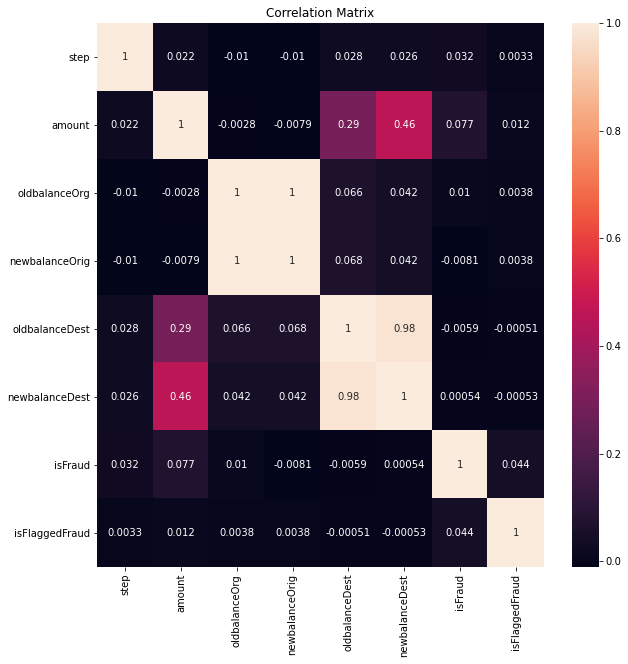

In [56]:
plt.figure(figsize=(10,10))
sns.heatmap(corrMatrix,annot=True)
plt.title("Correlation Matrix")

In [57]:
#Correlation matrix for fraudulent transactions data

corrMatrix=data[(data["isFraud"]==1.0)].corr()
corrMatrix

#The values corresponding to isFraud is Nan because its value is always 1

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.048320,0.063305,0.058487,0.018706,0.027891,NaN,0.034538
amount,0.048320,1.000000,0.858859,0.338561,-0.007037,0.299403,NaN,0.062365
oldbalanceOrg,0.063305,0.858859,1.000000,0.767811,-0.013187,0.185974,NaN,0.076819
newbalanceOrig,0.058487,0.338561,0.767811,1.000000,-0.015964,-0.032040,NaN,0.171402
oldbalanceDest,0.018706,-0.007037,-0.013187,-0.015964,1.000000,0.880353,NaN,-0.007207
newbalanceDest,0.027891,0.299403,0.185974,-0.032040,0.880353,1.000000,NaN,-0.014465
isFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
isFlaggedFraud,0.034538,0.062365,0.076819,0.171402,-0.007207,-0.014465,NaN,1.000000


Text(0.5, 1.0, 'Correlation Matrix for Fraudulent Transactions')

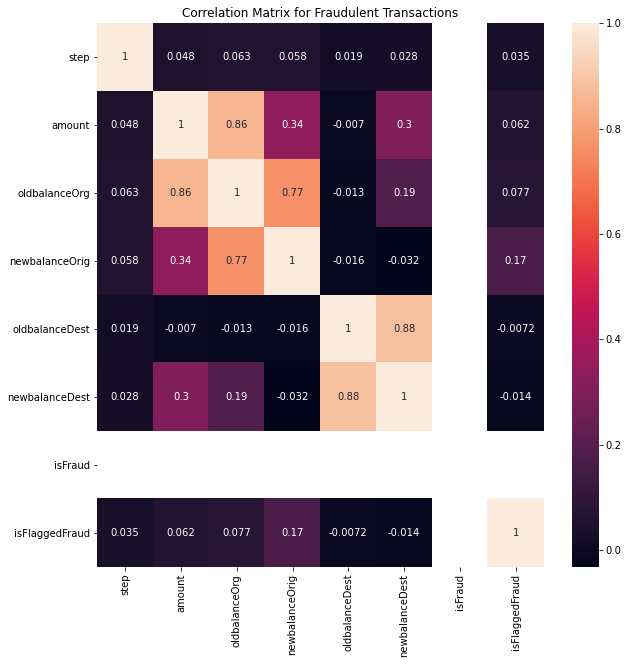

In [58]:
plt.figure(figsize=(10,10))
sns.heatmap(corrMatrix,annot=True)
plt.title("Correlation Matrix for Fraudulent Transactions")

In [59]:
columns=data.columns
columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [60]:
#Finding out numerical columns

numericalColumns = data.select_dtypes(include=np.number).columns.tolist()
print("Numerical columns:\n"+str(numericalColumns))

Numerical columns:
['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest', 'isFraud', 'isFlaggedFraud']


In [61]:
#Finding out categorical columns

categoricalColumns=[i for i in columns if i not in numericalColumns]
print("Categorical columns:\n"+str(categoricalColumns))

Categorical columns:
['type', 'nameOrig', 'nameDest']


In [62]:
discreteColumns=["isFraud","isFlaggedFraud"]

continuousColumns=[i for i in columns if i in numericalColumns and i not in discreteColumns]

print("Discrete columns:\n"+str(discreteColumns))
print("Continuous columns:\n"+str(continuousColumns))

Discrete columns:
['isFraud', 'isFlaggedFraud']
Continuous columns:
['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']


<font size="5">**Data Visualization**</font>

In [631]:
plt.style.use('fivethirtyeight')
colorPalette=["#E0D8C3","#0D97AC","#E2532F","#DDA033","#065125"]

c:\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


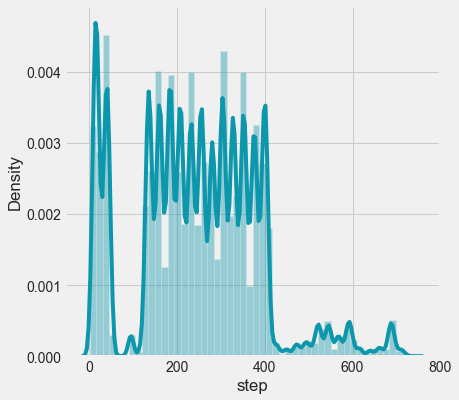

c:\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


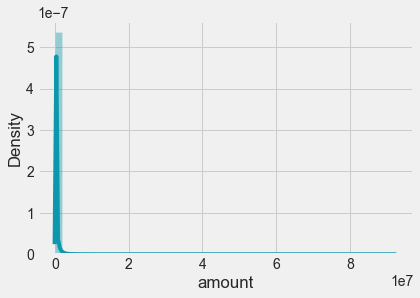

c:\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


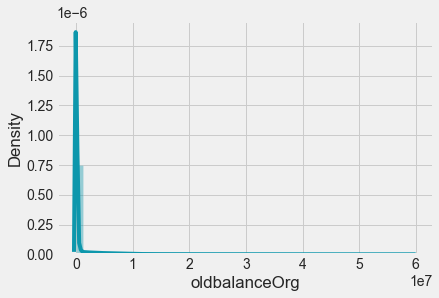

c:\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


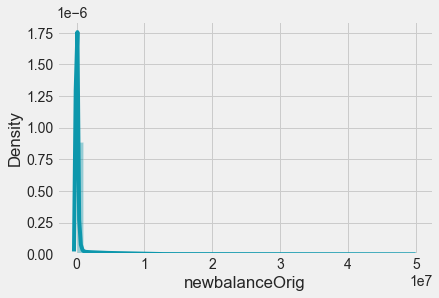

c:\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


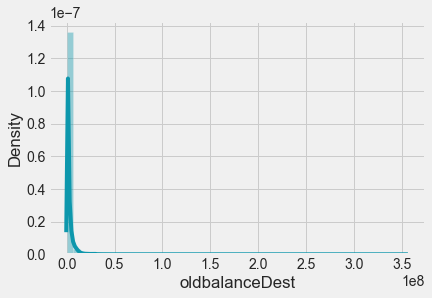

c:\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


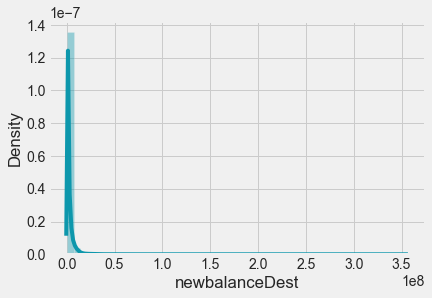

In [632]:
#Distribution plot for continuous features

plt.figure(figsize=(6,6))
for i in continuousColumns:
    sns.distplot(data[i],color=colorPalette[1])
    plt.show()

c:\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


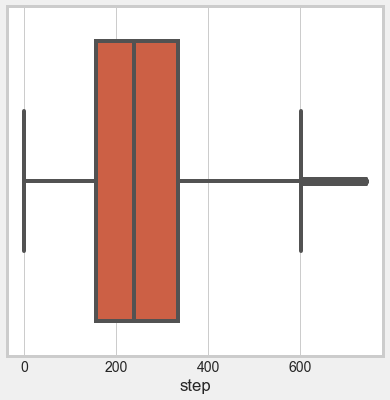

c:\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


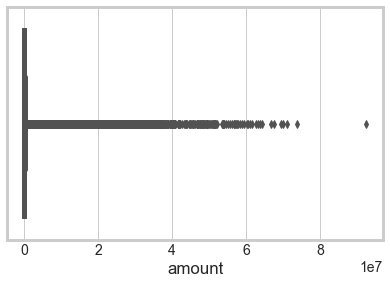

c:\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


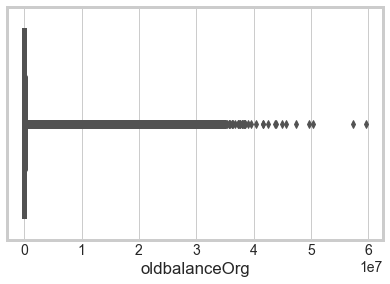

c:\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


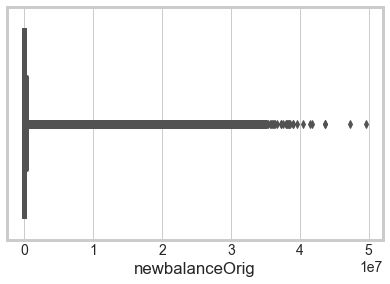

c:\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


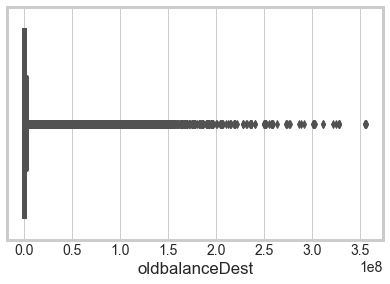

c:\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


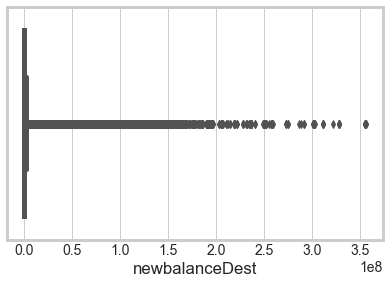

c:\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


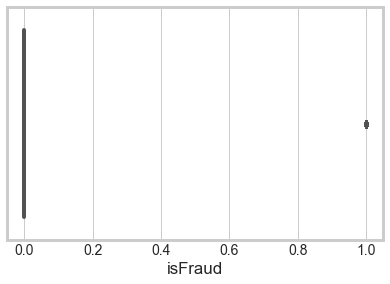

c:\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


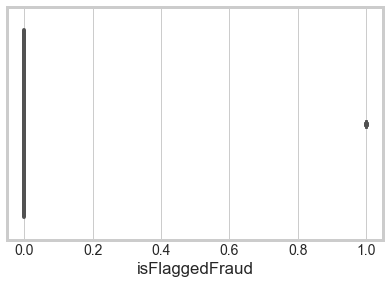

In [633]:
#Box plot for numerical features

plt.figure(figsize=(6,6))
sns.set_style("whitegrid")
for i in numericalColumns:
    sns.boxplot(data[i],color=colorPalette[2])
    plt.show()

<u>Observation:</u> 

There are too many outliers in the dataset. Since, fraud detection is closely associated with outliers, these shouldn't be discarded.

c:\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Fraudulent transactions')

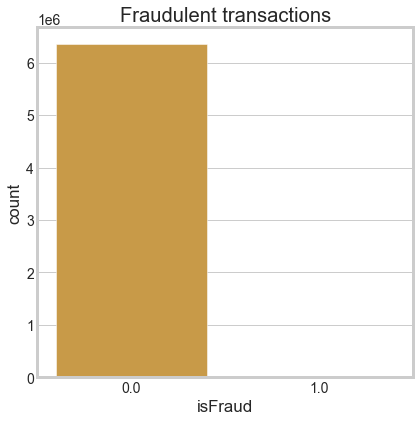

In [634]:
plt.figure(figsize=(6,6))
sns.countplot(data["isFraud"],color=colorPalette[3])
plt.title("Fraudulent transactions")

<u>Observation:</u>

The dataset is highly imbalanced. The number of records that record fraudulent transactions are very less as compared to those which record fair transactions.

In [635]:
pieData=data.groupby("isFraud")["amount"].count()
pieData

isFraud
0.0    6354394
1.0       8213
Name: amount, dtype: int64

Text(0.5, 1.0, 'Percentage of Fraudulent Transactions')

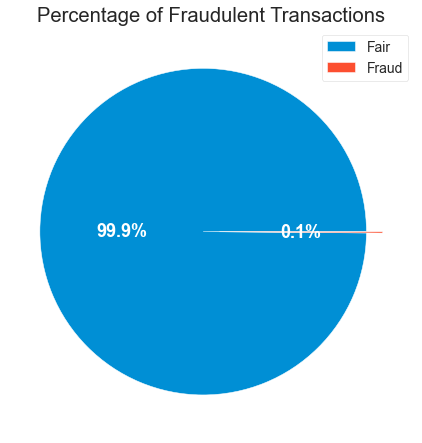

In [636]:
plt.figure(figsize=(7,7))
labels=["Fair","Fraud"]
_, _, autopcts=plt.pie(x=pieData, autopct="%.1f%%", explode=[0.05]*len(pieData), pctdistance=0.5)
plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':18})
plt.legend(labels)
plt.title("Percentage of Fraudulent Transactions")

<u>Observation:</u>

Only 0.1% records track fraudulent transactions.

c:\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


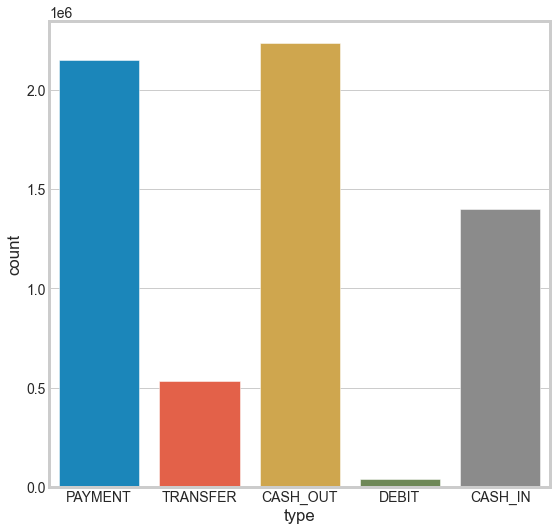

In [637]:
plt.figure(figsize=(8,8))
sns.countplot(data["type"])

<u>Observation:</u>

PAYMENT, CASH_OUT and CASH_IN transaction types dominate over the other two.

In [638]:
pieData=data.groupby("type")["amount"].count()
pieData

type
CASH_IN     1399284
CASH_OUT    2237499
DEBIT         41431
PAYMENT     2151494
TRANSFER     532909
Name: amount, dtype: int64

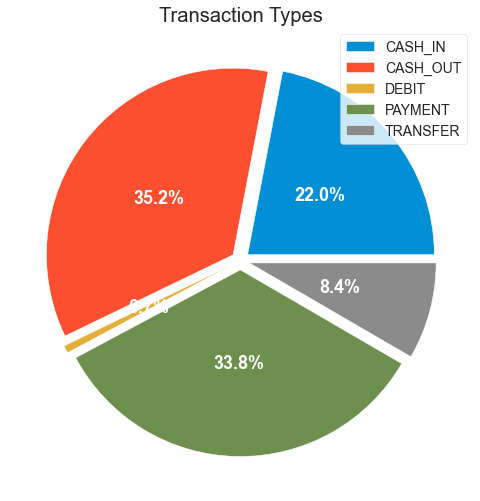

In [639]:
plt.figure(figsize=(8,8))
labels=pieData.keys()
#plt.pie(x=pieData, autopct="%.1f%%", pctdistance=0.5,colors=colorPalette)
_, _, autopcts=plt.pie(x=pieData, autopct="%.1f%%", explode=[0.05]*len(pieData), pctdistance=0.5)
plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':18})
plt.legend(labels,loc="best")
plt.title("Transaction Types")
plt.show()

<u>Observation:</u>

The chart provides summary of what transaction types are used in the dataset.

In [640]:
transactionTypes=list(data.type.unique())
transactionTypes.remove(np.nan)
transactionTypes

['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN']

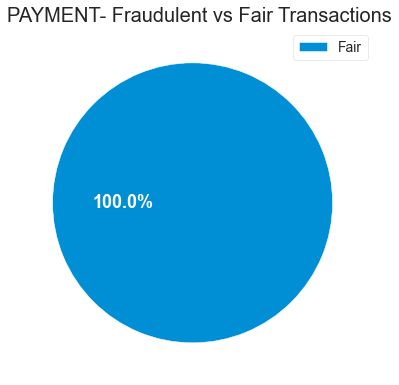

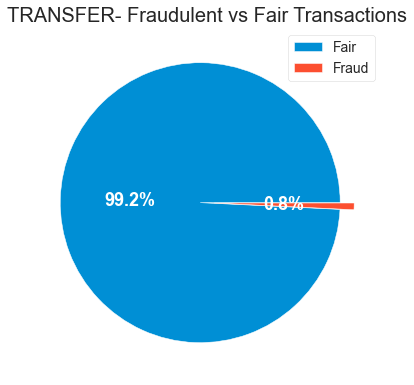

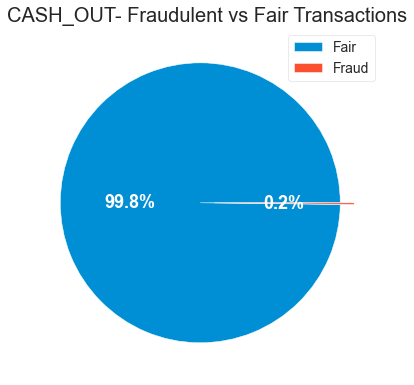

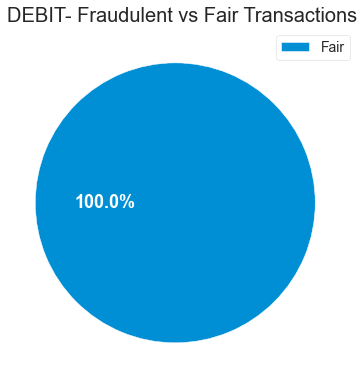

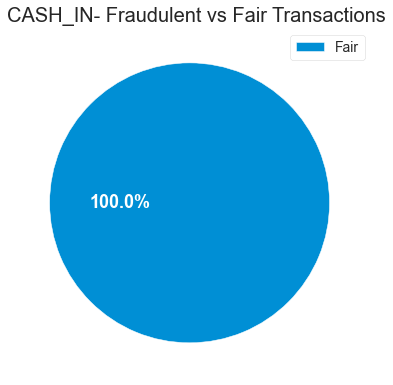

In [641]:
labels=["Fair","Fraud"]
for i in transactionTypes:
    plt.figure(figsize=(6,6))
    pieData=data[(data["type"]==i)].groupby("isFraud")["amount"].count()
    _, _, autopcts=plt.pie(x=pieData, autopct="%.1f%%", explode=[0.05]*len(pieData), pctdistance=0.5)
    plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':18})
    plt.legend(labels)
    plt.title(i+"- Fraudulent vs Fair Transactions",fontsize=20)
    plt.show()   

<u>Observation:</u>

Out of the 5 payment methods used, only CASH_OUT and TRANSFER payment methods contribute to fraudulent transactions.

In [642]:
pieData=data[(data["isFraud"]==1.0)].groupby("type")["amount"].count()
pieData

type
CASH_OUT    4116
TRANSFER    4097
Name: amount, dtype: int64

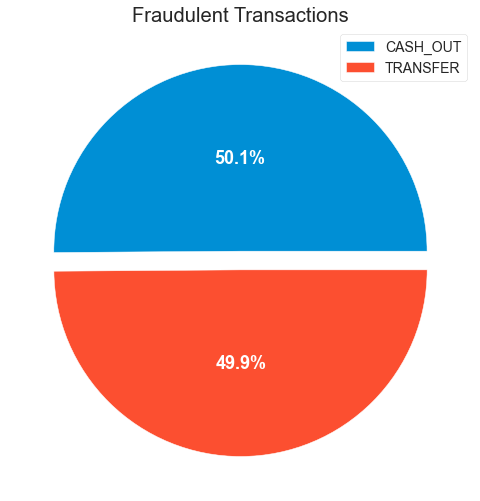

In [643]:
plt.figure(figsize=(8,8))
labels=pieData.keys()
_, _, autopcts=plt.pie(x=pieData, autopct="%.1f%%", explode=[0.05]*len(pieData), pctdistance=0.5)
plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':18})
plt.legend(labels,loc="best")
plt.title("Fraudulent Transactions")
plt.show()

<u>Observation:</u>

The use of above two transaction types contribute almost equally to the fradulent transactions.

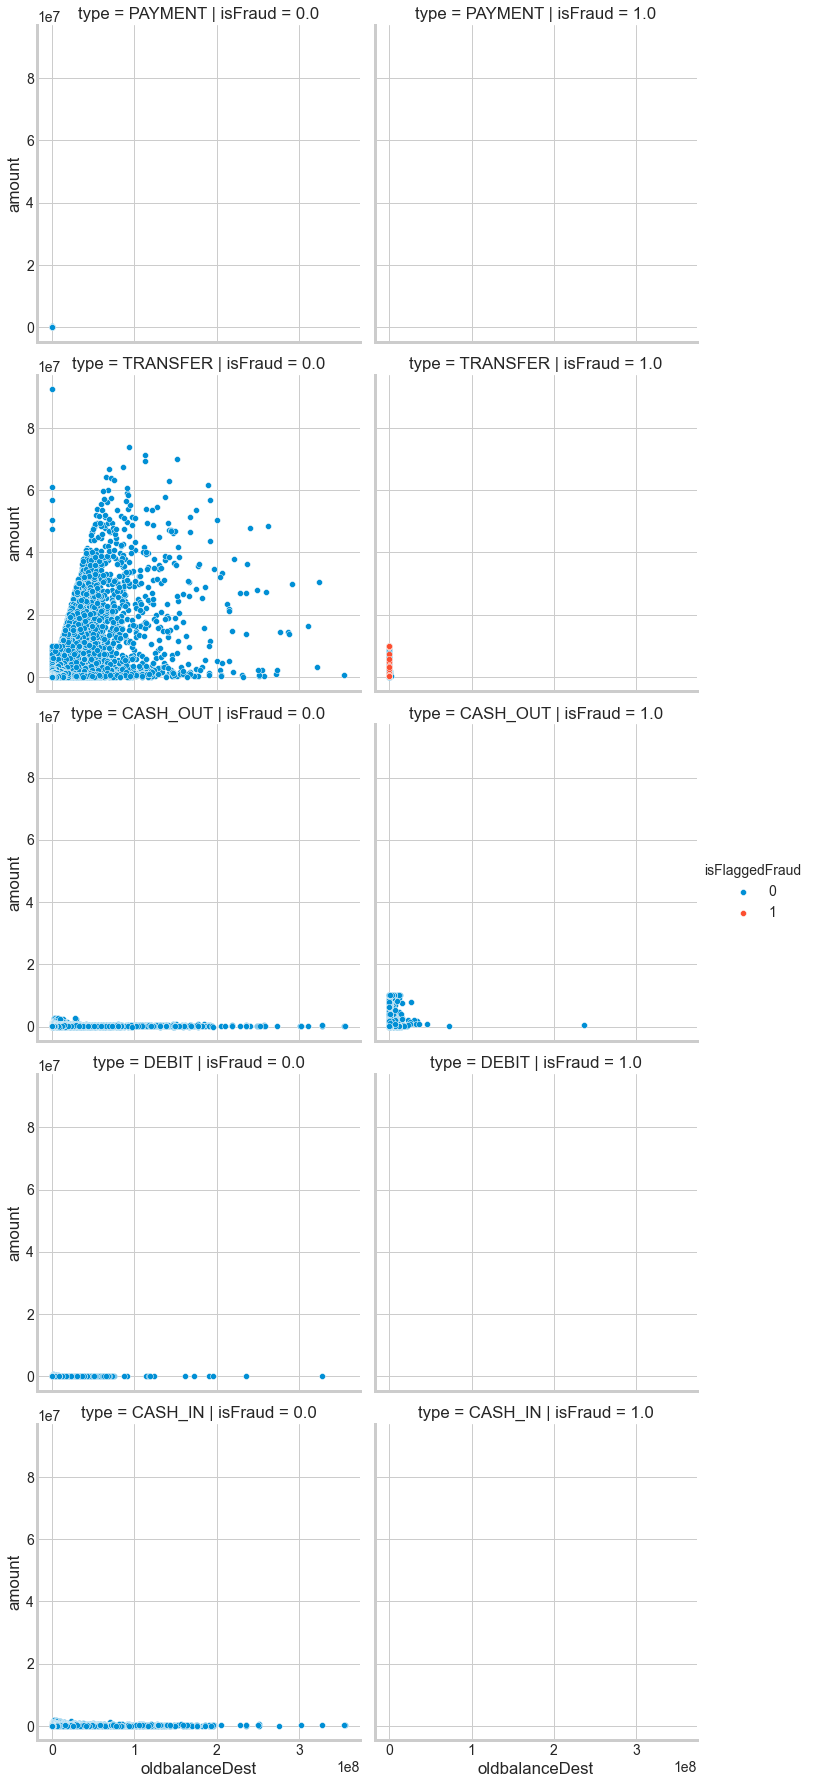

In [644]:
fraudBalanceAnalysis=sns.FacetGrid(data, row='type', col='isFraud',hue="isFlaggedFraud",height=5)
fraudBalanceAnalysis.map(sns.scatterplot, "oldbalanceDest","amount").add_legend()

<u>Observation:</u>

In most of the fraudulent transactions, the initial destination balance is very less (almost 0). In case of TRANSFER type transaction many cases indicate that the system flags illegal attempt for the transaction. But in case of CASH_OUT type transactions there is no such record.

c:\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\python\python38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for hi

Text(0.5, 1.0, 'Time of Transaction')

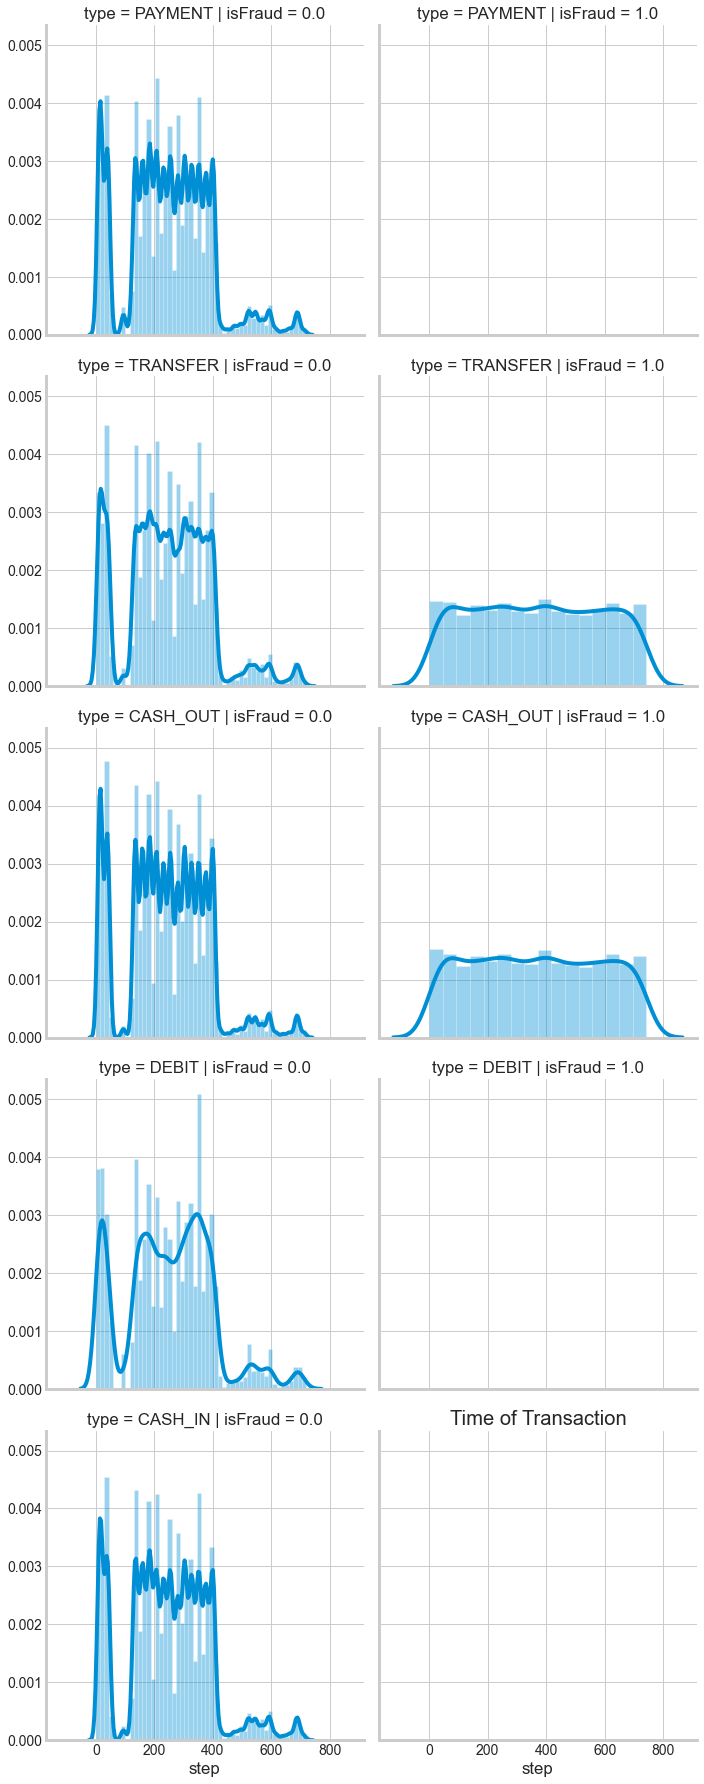

In [645]:
fraudTimeAnalysis=sns.FacetGrid(data, row='type', col='isFraud',height=5)
fraudTimeAnalysis.map(sns.distplot,"step")
plt.title("Time of Transaction")

<u>Observation</u>

The fraudulent transactions do not show any particular pattern with regard to the time/day. They happen throughout the month.

Text(0.5, 1.0, "Fraudulent Transaction- Origin's Old Balance vs Transaction Amount")

<Figure size 576x576 with 0 Axes>

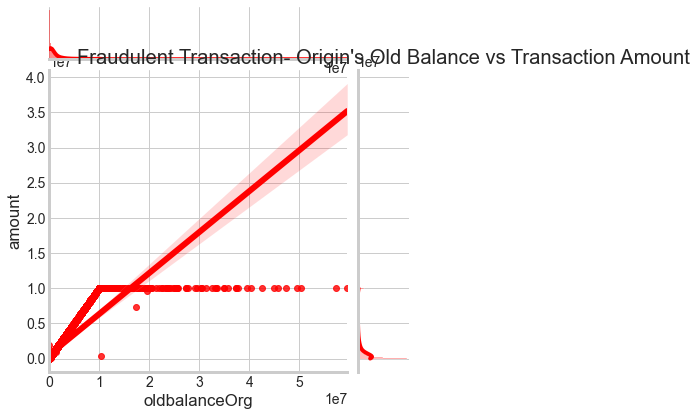

In [646]:
plt.figure(figsize=(8,8))
sns.jointplot(x = data[(data["isFraud"]==1.0)]["oldbalanceOrg"] , y= data[(data["isFraud"]==1.0)]["amount"], kind='reg',color="red")
plt.title("Fraudulent Transaction- Origin's Old Balance vs Transaction Amount")

<u>Observation:</u>

The above plot shows the strength of relationship between transaction amount and the origin of fraud. The data records a positive correlation between these features.

<font size="6">**DATA PREPROCESSING**</font>

In [8]:
# Changing column names

data.columns=["time_step", "transaction_type", "transaction_amount", "origin", "origin_initial_balance", "origin_final_balance", "destination", "dest_initial_balance", "dest_final_balance", "is_fraud", "is_flagged_fraud"]

In [9]:
data.head()

,time_step,transaction_type,transaction_amount,origin,origin_initial_balance,origin_final_balance,destination,dest_initial_balance,dest_final_balance,is_fraud,is_flagged_fraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,NaN,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0


<font size="5">**Handling Inappropriate Data**</font>

<font size="4">**(a) time_step**</font>

In [10]:
data[(data.time_step<0) | (data.time_step>743)]

,time_step,transaction_type,transaction_amount,origin,origin_initial_balance,origin_final_balance,destination,dest_initial_balance,dest_final_balance,is_fraud,is_flagged_fraud


<font size="4">**(b) transaction_type**</font>

In [11]:
data.transaction_type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', nan, 'CASH_IN'],
      dtype=object)

<font size="4">**(c) transaction_amount**</font>

In [12]:
data[data.transaction_amount<0]

,time_step,transaction_type,transaction_amount,origin,origin_initial_balance,origin_final_balance,destination,dest_initial_balance,dest_final_balance,is_fraud,is_flagged_fraud


<font size="4">**(d) origin**</font>

In [13]:
data.origin.sort_values().unique()

array(['C1000000639', 'C1000001337', 'C1000001725', ..., 'C999999614',
       'C999999784', nan], dtype=object)

<font size="4">**(e) origin_initial_balance**</font>

In [14]:
data[data.origin_initial_balance<0]

,time_step,transaction_type,transaction_amount,origin,origin_initial_balance,origin_final_balance,destination,dest_initial_balance,dest_final_balance,is_fraud,is_flagged_fraud


<font size="4">**(f) origin_final_balance**</font>

In [15]:
data[data.origin_final_balance<0]

,time_step,transaction_type,transaction_amount,origin,origin_initial_balance,origin_final_balance,destination,dest_initial_balance,dest_final_balance,is_fraud,is_flagged_fraud


<font size="4">**(g) destination**</font>

In [16]:
data.destination.sort_values().unique()

array(['C1000004082', 'C1000004940', 'C1000013769', ..., 'M999999543',
       'M999999784', nan], dtype=object)

<font size="4">**(h) dest_initial_balance**</font>

In [17]:
data[data.dest_initial_balance<0]

,time_step,transaction_type,transaction_amount,origin,origin_initial_balance,origin_final_balance,destination,dest_initial_balance,dest_final_balance,is_fraud,is_flagged_fraud


<font size="4">**(i) dest_final_balance**</font>

In [18]:
data[data.dest_final_balance<0]

,time_step,transaction_type,transaction_amount,origin,origin_initial_balance,origin_final_balance,destination,dest_initial_balance,dest_final_balance,is_fraud,is_flagged_fraud


<font size="4">**(j) is_fraud**</font>

In [19]:
#data[(data.is_fraud!=0) & (data.is_fraud!=1)]

In [20]:
data.is_fraud.dtype

dtype('float64')

The data in the column is_fraud is of float type. This needs to be converted to integer type. 

In [21]:
data.is_fraud.unique()

array([ 0., nan,  1.])

Since, the column contains null values, it is converted to int type after treating the null values.

<font size="4">**(k) is_flagged_fraud**</font>

In [22]:
data[(data.is_flagged_fraud!=0) & (data.is_flagged_fraud!=1)]

,time_step,transaction_type,transaction_amount,origin,origin_initial_balance,origin_final_balance,destination,dest_initial_balance,dest_final_balance,is_fraud,is_flagged_fraud


In [23]:
data.is_flagged_fraud.dtype

dtype('int64')

<font size="5">**Treating Duplicate Data**</font>

<font size="4">**(a) Columns**</font>

Clearly, there are no duplicated columns present in the dataset.

<font size="4">**(b) Rows**</font>

In [24]:
print(len(data.index))
print(data.duplicated().sum())

6362620
0


There are no duplicated rows present in the dataset.

<font size="5">**Treating Missing Data**</font>

In [25]:
(data.isnull().sum()/len(data.index))*100

time_step                 0.000000
transaction_type          0.000047
transaction_amount        0.000000
origin                    0.000063
origin_initial_balance    0.000000
origin_final_balance      0.000000
destination               0.000079
dest_initial_balance      0.000000
dest_final_balance        0.000000
is_fraud                  0.000204
is_flagged_fraud          0.000000
dtype: float64

There are very few missing values in the dataset.

In [26]:
data.isnull().sum()

time_step                  0
transaction_type           3
transaction_amount         0
origin                     4
origin_initial_balance     0
origin_final_balance       0
destination                5
dest_initial_balance       0
dest_final_balance         0
is_fraud                  13
is_flagged_fraud           0
dtype: int64

The columns Transaction Type, Origin, Destination and Is Fraud contain missing values.

<font size="4">**(a) transaction_type**</font>

Assuming the missing values in this column belong to the most common type of transaction in the dataset, the missing values in this column are replaced by the most frequently occuring value.

In [27]:
data.transaction_type.fillna(data.transaction_type.mode()[0],inplace=True)

<font size="4">**(b) origin**</font>

Assuming the most common initiator of the transaction initiates the missing transactions, the missing values are replaced by the most frequently occuring value in the column.

In [28]:
data.origin.fillna(data.origin.mode()[0],inplace=True)

<font size="4">**(c) destination**</font>

Assuming the most common destination account of the transaction participtes in the missing transactions, the missing values are replaced by the most frequently occuring value oin the column.

In [29]:
data.destination.fillna(data.destination.mode()[0],inplace=True)

In [30]:
data.isnull().sum()

time_step                  0
transaction_type           0
transaction_amount         0
origin                     0
origin_initial_balance     0
origin_final_balance       0
destination                0
dest_initial_balance       0
dest_final_balance         0
is_fraud                  13
is_flagged_fraud           0
dtype: int64

All missing values of categorical columns have been treated.

<font size="4">**(d) is_fraud**</font>

The rows that contain missing values in the column is_fraud do not contain any useful result. Hence, dropping the rows in this column which contain missing values.

In [31]:
data.dropna(subset=["is_fraud"], inplace=True)

In [32]:
data.isnull().sum()

time_step                 0
transaction_type          0
transaction_amount        0
origin                    0
origin_initial_balance    0
origin_final_balance      0
destination               0
dest_initial_balance      0
dest_final_balance        0
is_fraud                  0
is_flagged_fraud          0
dtype: int64

All missing values in the dataset are treated.

In [33]:
#Converting column is_fraud's type to int

data["is_fraud"]=data.is_fraud.astype(int)
data.is_fraud.dtype

dtype('int32')

<font size="5">**Treating Outliers**</font>

Since, frauds are positively associated with outliers, we are not discarding any such data. The previous plots indicate the presence of many outliers.

Are the outliers are associated with fraudulent data?
If we get a positive answer to this question, we will not make any modification to the data.

In [34]:
def outlierMaxMin(data,variable):
    IQR=data[variable].quantile(0.75)-data[variable].quantile(0.25)
    lowerBridge=data[variable].quantile(0.25)-(IQR*1.5)
    upperBridge=data[variable].quantile(0.75)+(IQR*1.5)
    return lowerBridge, upperBridge

In [35]:
m1,m2=outlierMaxMin(data,"transaction_amount")

len(data[(data["is_fraud"]==1.0) & ((data["transaction_amount"]<m1) | (data["transaction_amount"]>m2))])

3854

In [36]:
m1,m2=outlierMaxMin(data,"origin_initial_balance")

len(data[(data["is_fraud"]==1.0) & ((data["origin_initial_balance"]<m1) | (data["origin_initial_balance"]>m2))])

4966

In [37]:
m1,m2=outlierMaxMin(data,"origin_final_balance")

len(data[(data["is_fraud"]==1.0) & ((data["origin_final_balance"]<m1) | (data["origin_final_balance"]>m2))])

155

In [38]:
m1,m2=outlierMaxMin(data,"dest_initial_balance")

len(data[(data["is_fraud"]==1.0) & ((data["dest_initial_balance"]<m1) | (data["dest_initial_balance"]>m2))])

466

In [39]:
m1,m2=outlierMaxMin(data,"dest_final_balance")

len(data[(data["is_fraud"]==1.0) & ((data["dest_final_balance"]<m1) | (data["dest_final_balance"]>m2))])

1099

The above results show that many fraudulent records carry outliers. Hence, it is not a good idea to discard them.

<font size="5">**One Hot Encoding**</font>

In [40]:
one_hot_transaction=pd.get_dummies(data["transaction_type"])
one_hot_transaction.head()

,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,0,0,0,1,0
2,0,0,0,0,1
3,0,1,0,0,0
4,0,0,0,1,0
5,0,0,0,1,0


In [41]:
data=data.drop("transaction_type",axis=1)
data=data.join(one_hot_transaction)

data.head()

,time_step,transaction_amount,origin,origin_initial_balance,origin_final_balance,destination,dest_initial_balance,dest_final_balance,is_fraud,is_flagged_fraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,0,0,0,1,0
5,1,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0,0,0,0,0,1,0


<font size="5">**Preparing Data for Prediction**</font>

In [42]:
features=data.drop(["origin","destination","is_fraud"],axis=1) 
#Origin and destination accounts have been dropped by domain perspective since any account can participate in a fraud

features.head()

,time_step,transaction_amount,origin_initial_balance,origin_final_balance,dest_initial_balance,dest_final_balance,is_flagged_fraud,CASH_IN,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,1,0
5,1,7817.71,53860.0,46042.29,0.0,0.0,0,0,0,0,1,0


In [43]:
labels=data["is_fraud"]

<font size="5">**TRAINING AND TESTING**</font>

In this section, three classfication algorithms are used:

1. Logistic Regression<br>
2. K-Nearest Neighbors<br>
3. Decision Tree

<u>Note:</u><br>
The feature scaling and spliting has been done while applying the learning algorithms in order to get the correct value of random state.

<font size="5">**LOGISTIC REGRESSION**</font>

In [734]:
for i in range(100):
    X_train,X_test,Y_train,Y_test=train_test_split(features,labels,test_size=0.2,random_state=i)
    
    #Feature Scaling
    scaler=StandardScaler()
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    
    
    logReg=LogisticRegression(max_iter=1000)
    logReg.fit(X_train,Y_train)
    
    trainScore=logReg.score(X_train,Y_train)
    testScore=logReg.score(X_test,Y_test)
    
    if testScore>trainScore:
        print("Test Score: {} Train Score: {} Random State: {}".format(testScore,trainScore,i))    

Test Score: 0.9992589519081007 Train Score: 0.9992231956833727 Random State: 1
Test Score: 0.9992778120928362 Train Score: 0.9992196593966506 Random State: 2
Test Score: 0.9992880280262345 Train Score: 0.9992186770947833 Random State: 3
Test Score: 0.999244806769549 Train Score: 0.9992286965738293 Random State: 5
Test Score: 0.999255808543978 Train Score: 0.9992255532078541 Random State: 6
Test Score: 0.9992620952722232 Train Score: 0.9992263390493479 Random State: 7
Test Score: 0.999266810318407 Train Score: 0.9992265355097214 Random State: 8
Test Score: 0.9992416634054264 Train Score: 0.9992294824153232 Random State: 10
Test Score: 0.9992605235901619 Train Score: 0.9992233921437461 Random State: 11
Test Score: 0.9992565943850087 Train Score: 0.9992265355097214 Random State: 13
Test Score: 0.9992306616309974 Train Score: 0.9992292859549496 Random State: 14
Test Score: 0.9992385200413038 Train Score: 0.9992286965738293 Random State: 16
Test Score: 0.9992385200413038 Train Score: 0.9992

Random state 3 is chosen from here.

In [735]:
X_train,X_test,Y_train,Y_test=train_test_split(features,labels,test_size=0.2,random_state=3)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

logReg=LogisticRegression(max_iter=1000)
logReg.fit(X_train,Y_train)
    
trainScore=logReg.score(X_train,Y_train)
testScore=logReg.score(X_test,Y_test)

print("Train Score: ",trainScore)
print("Test Score",testScore)

Train Score:  0.9992186770947833
Test Score 0.9992880280262345


In [747]:
Y_pred=logReg.predict(X_test)
print("Confusion Matrix:\n\n",confusion_matrix(Y_test,Y_pred))

Confusion Matrix:

 [[1270898      60]
 [    846     718]]


Support(0)=1270958
Support(1)=1564
Not tolerable event=Fraud predicted as fair.

Precision(0)=1270898/(1270898+846)=0.9993
Recall(1)=718/(718+846)=0.4591
Average=0.729515

In [748]:
print("Classification Report:\n")
print(classification_report(Y_test, Y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270958
           1       0.92      0.46      0.61      1564

    accuracy                           1.00   1272522
   macro avg       0.96      0.73      0.81   1272522
weighted avg       1.00      1.00      1.00   1272522



Not toleratble event--> Fraudulent transaction labelled as fair transaction

Average of Precision(0) and Recall(1):<br>
(1.00+0.46) / 2 = 0.73

<font size="5">**DECISION TREE**</font>

In [44]:
X_train,X_test,Y_train,Y_test=train_test_split(features,labels,test_size=0.2,random_state=0)
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

dec=DecisionTreeClassifier()
dec.fit(X_train,Y_train)
    
trainScore=dec.score(X_train,Y_train)
testScore=dec.score(X_test,Y_test)

print("Train Score: ",trainScore)
print("Test Score",testScore)

Train Score:  1.0
Test Score 0.9997170972289674


In [45]:
Y_pred=dec.predict(X_test)
print("Confusion Matrix:\n\n",confusion_matrix(Y_test,Y_pred))

Confusion Matrix:

 [[1270732     152]
 [    208    1430]]


In [46]:
print("Classification Report:\n")
print(classification_report(Y_test, Y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270884
           1       0.90      0.87      0.89      1638

    accuracy                           1.00   1272522
   macro avg       0.95      0.94      0.94   1272522
weighted avg       1.00      1.00      1.00   1272522



In [50]:
joblib.dump(dec,"FraudDetectorModel.pkl")

['FraudDetectorModel.pkl']

Not toleratble event--> Fraudulent transaction labelled as fair transaction

Average of Precision(0) and Recall(1):<br>
(1.00+0.87) / 2 = 0.935

The accuracy of train score is very high (100%). The test score is less than train score, hence, this is an overfitted model.<br>
In order to solve the problem of overfitting, bagging technique is used.

<font size="5">**Bagging**</font>

 <font size="4">**(a) Shuffling**</font>

In [152]:
baggingClassifier=BaggingClassifier(n_estimators=9,base_estimator=dec)
baggingClassifier.fit(X_train,Y_train)

trainScore=baggingClassifier.score(X_train,Y_train)
testScore=baggingClassifier.score(X_test,Y_test)

print("Train Score: ",trainScore)
print("Test Score",testScore)

Train Score:  0.9999795681211611
Test Score 0.9997516742343158


<u>Result:</u><br>
Train score>Test score

In [103]:
Y_pred=baggingClassifier.predict(X_test)
print("Confusion Matrix:\n\n",confusion_matrix(Y_test,Y_pred))

Confusion Matrix:

 [[1270805      79]
 [    239    1399]]


In [104]:
print("Classification Report:\n")
print(classification_report(Y_test, Y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270884
           1       0.95      0.85      0.90      1638

    accuracy                           1.00   1272522
   macro avg       0.97      0.93      0.95   1272522
weighted avg       1.00      1.00      1.00   1272522



Not toleratble event--> Fraudulent transaction labelled as fair transaction

Average of Precision(0) and Recall(1):<br>
(1.00+0.85) / 2 = 0.925

 <font size="4">**(b) Sample With Replacement**</font>

In [101]:
sampleSize=int(round(np.sqrt(len(X_train))))

In [102]:
print(sampleSize)

2256


In [108]:
baggingReplacement=BaggingClassifier(n_estimators=10,base_estimator=dec,max_samples=sampleSize,bootstrap=True)
baggingReplacement.fit(X_train,Y_train)

trainScore=baggingReplacement.score(X_train,Y_train)
testScore=baggingReplacement.score(X_test,Y_test)

print("Train Score: ",trainScore)
print("Test Score",testScore)

Train Score:  0.9988281138723617
Test Score 0.9988235959771226


<u>Result:</u><br>
Train score>Test score

In [109]:
Y_pred=baggingReplacement.predict(X_test)
print("Confusion Matrix:\n\n",confusion_matrix(Y_test,Y_pred))

Confusion Matrix:

 [[1270884       0]
 [   1497     141]]


In [110]:
print("Classification Report:\n")
print(classification_report(Y_test, Y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270884
           1       1.00      0.09      0.16      1638

    accuracy                           1.00   1272522
   macro avg       1.00      0.54      0.58   1272522
weighted avg       1.00      1.00      1.00   1272522



<u>Not toleratble event</u>--> Fraudulent transaction labelled as fair transaction

Average of Precision(0) and Recall(1):<br>
(1.00+0.09) / 2 = 0.545

<font size="4">**(c) Sample Without Replacement**</font>

In [111]:
baggingWithoutReplacement=BaggingClassifier(n_estimators=10,base_estimator=dec,max_samples=sampleSize,bootstrap=False)
baggingWithoutReplacement.fit(X_train,Y_train)

trainScore=baggingWithoutReplacement.score(X_train,Y_train)
testScore=baggingWithoutReplacement.score(X_test,Y_test)

print("Train Score: ",trainScore)
print("Test Score",testScore)

Train Score:  0.9987082730445562
Test Score 0.9987127923918014


In [112]:
Y_pred=baggingWithoutReplacement.predict(X_test)
print("Confusion Matrix:\n\n",confusion_matrix(Y_test,Y_pred))

Confusion Matrix:

 [[1270884       0]
 [   1638       0]]


In [114]:
print("Classification Report:\n")
print(classification_report(Y_test, Y_pred))

Classification Report:



c:\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270884
           1       0.00      0.00      0.00      1638

    accuracy                           1.00   1272522
   macro avg       0.50      0.50      0.50   1272522
weighted avg       1.00      1.00      1.00   1272522



c:\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<u>Not toleratble event</u>--> Fraudulent transaction labelled as fair transaction

Average of Precision(0) and Recall(1):<br>
(1.00+0.00) / 2 = 0.50

<font size="5">**RANDOM FOREST**</font>

 <font size="4">**(a) Shuffling**</font>

In [118]:
randomForest=RandomForestClassifier(n_estimators=15)
randomForest.fit(X_train,Y_train)

trainScore=randomForest.score(X_train,Y_train)
testScore=randomForest.score(X_test,Y_test)

print("Train Score: ",trainScore) 
print("Test Score",testScore)

Train Score:  0.9999660123553928
Test Score 0.9997249556392738


<u>Result:</u><br>
Test score < Train score

In [120]:
Y_pred=randomForest.predict(X_test)
print("Confusion Matrix:\n\n",confusion_matrix(Y_test,Y_pred))

Confusion Matrix:

 [[1270920      38]
 [    312    1252]]


In [121]:
print("Classification Report:\n")
print(classification_report(Y_test, Y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270958
           1       0.97      0.80      0.88      1564

    accuracy                           1.00   1272522
   macro avg       0.99      0.90      0.94   1272522
weighted avg       1.00      1.00      1.00   1272522



<u>Not toleratble event</u>--> Fraudulent transaction labelled as fair transaction

Average of Precision(0) and Recall(1):<br>
(1.00+0.80) / 2 = 0.900

 <font size="4">**(b) Sample With Replacement**</font>

In [122]:
rfReplacement=RandomForestClassifier(n_estimators=11,max_samples=sampleSize,bootstrap=True)
rfReplacement.fit(X_train,Y_train)

trainScore=rfReplacement.score(X_train,Y_train)
testScore=rfReplacement.score(X_test,Y_test)

print("Train Score: ",trainScore)
print("Test Score",testScore)

Train Score:  0.9986937349769208
Test Score 0.9987709446280693


<u>Result:</u><br>
Test score>Train score

In [124]:
Y_pred=rfReplacement.predict(X_test)
print("Confusion Matrix:\n\n",confusion_matrix(Y_test,Y_pred))

Confusion Matrix:

 [[1270958       0]
 [   1564       0]]


In [125]:
print("Classification Report:\n")
print(classification_report(Y_test, Y_pred))

Classification Report:



c:\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270958
           1       0.00      0.00      0.00      1564

    accuracy                           1.00   1272522
   macro avg       0.50      0.50      0.50   1272522
weighted avg       1.00      1.00      1.00   1272522



c:\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<u>Not toleratble event</u>--> Fraudulent transaction labelled as fair transaction

Average of Precision(0) and Recall(1):<br>
(1.00+0.00) / 2 = 0.50

<font size="4">**(c) Sample Without Replacement**</font>

In [153]:
rfWithoutReplacement=RandomForestClassifier(n_estimators=17,max_samples=sampleSize,bootstrap=False)
rfWithoutReplacement.fit(X_train,Y_train)

trainScore=rfWithoutReplacement.score(X_train,Y_train)
testScore=rfWithoutReplacement
.score(X_test,Y_test)

print("Train Score: ",trainScore)
print("Test Score",testScore)

Train Score:  1.0
Test Score 0.9997108105007222


<u>Result:</u><br>
Test score<Train score

In [154]:
Y_pred=rfWithoutReplacement.predict(X_test)
print("Confusion Matrix:\n\n",confusion_matrix(Y_test,Y_pred))

Confusion Matrix:

 [[1270843      41]
 [    327    1311]]


In [155]:
print("Classification Report:\n")
print(classification_report(Y_test, Y_pred))

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1270884
           1       0.97      0.80      0.88      1638

    accuracy                           1.00   1272522
   macro avg       0.98      0.90      0.94   1272522
weighted avg       1.00      1.00      1.00   1272522



<u>Not toleratble event</u>--> Fraudulent transaction labelled as fair transaction

Average of Precision(0) and Recall(1):<br>
(1.00+0.81) / 2 = 0.905